In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv(r'E:\Udemy\Machine Learning A-Z\Part 6 - Reinforcement Learning\Section 32 - Upper Confidence Bound (UCB)\Ads_CTR_Optimisation.csv')

dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [3]:
import math
N = 10000
d = 10
number_of_selection = [0] * d
sum_of_rewards = [0] * d
ad_selected = []
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (number_of_selection[i] > 0):
            average_reward = sum_of_rewards[i] / number_of_selection[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / number_of_selection[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ad_selected.append(ad)
    number_of_selection[ad] = number_of_selection[ad] + 1
    reward = dataset.values[n, ad]
    sum_of_rewards[ad] = sum_of_rewards[ad] + reward
    total_reward = total_reward + reward


[120, 47, 7, 38, 1675, 1, 27, 236, 20, 7]


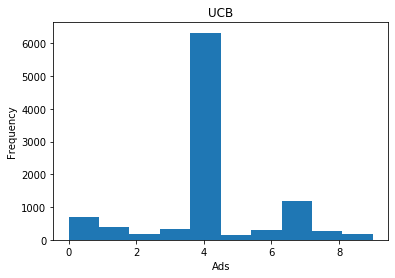

In [5]:
# Visualising results

plt.hist(ad_selected)
plt.title('UCB')
plt.xlabel('Ads')
plt.ylabel('Frequency')
plt.show()